# CALLING ALL THE REQUIRED LIBARIES

In [7]:
import math
import pandas as pd
import numpy as np
import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

from tensorflow import keras
layers = keras.layers
models = keras.models

# READING .CSV FILE

In [8]:
data = pd.read_csv("diabetes.csv")
data.head()
copy1 = data.copy()
print(data.shape)
len(data)


(768, 9)


768

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# IN ORDER TO REMOVE BIASNESS WE SHUFFLE THE DATA AND CHECK IT

In [10]:
data = shuffle(data)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
48,7,103,66,32,0,39.1,0.344,31,1
490,2,83,65,28,66,36.8,0.629,24,0
437,5,147,75,0,0,29.9,0.434,28,0
591,2,112,78,50,140,39.4,0.175,24,0
680,2,56,56,28,45,24.2,0.332,22,0


# WE NEED TO MAKE COPY OF THE DATA S THAT NOTHING HAPPENS TO ORIGNAL ONE

In [11]:
copy1 = data.copy()

### WE PLACE OUR WHOLE DATA IN AN ARRAY FOR DATA MANUPULATION

In [12]:
data =  np.array(data) 


### DECIDING THE LENGTH OF TRAINING ,  TESTING AND VALIDATING DATA SET 

In [14]:
train_size=math.ceil(int(len(data)*.7))
print(train_size)
test_size = math.ceil(int(len(data)*.2))
print(test_size)
validation_size = math.ceil(int(len(data)*.1))
print(validation_size)

538+153

537
153
76


691

### THE MOST IMPORTANT STEP IS TO SPLIT THE DATA IN TRAIN DATA ,TEST DATA, VALIDATION DATA. AND FORMING ITS VECTORIZE FORM

In [15]:

train_data= data[:538, :9].astype('float')
print(train_data)
print(len(train_data))
print(train_data.dtype)
test_data=data[538:691,:9].astype('float')
print(test_data)
print(len(test_data))
validation_data = data[691:769,:9].astype('float')
print(validation_data)
print(len(validation_data))


[[  7.    103.     66.    ...   0.344  31.      1.   ]
 [  2.     83.     65.    ...   0.629  24.      0.   ]
 [  5.    147.     75.    ...   0.434  28.      0.   ]
 ...
 [  0.    119.     66.    ...   0.259  22.      0.   ]
 [  1.     87.     60.    ...   0.509  22.      0.   ]
 [  1.     83.     68.    ...   0.624  27.      0.   ]]
538
float64
[[2.000e+00 9.900e+01 7.000e+01 ... 2.350e-01 2.700e+01 0.000e+00]
 [8.000e+00 8.500e+01 5.500e+01 ... 1.360e-01 4.200e+01 0.000e+00]
 [1.000e+00 1.000e+02 7.200e+01 ... 6.580e-01 2.800e+01 0.000e+00]
 ...
 [3.000e+00 1.070e+02 6.200e+01 ... 6.780e-01 2.300e+01 1.000e+00]
 [1.000e+00 1.890e+02 6.000e+01 ... 3.980e-01 5.900e+01 1.000e+00]
 [1.000e+01 1.390e+02 8.000e+01 ... 1.441e+00 5.700e+01 0.000e+00]]
153
[[2.000e+00 9.900e+01 0.000e+00 0.000e+00 0.000e+00 2.220e+01 1.080e-01
  2.300e+01 0.000e+00]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01 0.000e+00]
 [7.000e+00 1.020e+02 7.400e+01 4.000e+01 1.050e+0

### SPILITING THE LABELS AND VECTORIZE THEM 

In [16]:

train_label= data[:538, 6:7].astype('float')
print(train_label)
print(len(train_label))
print(train_label.dtype)
test_label=data[538:691,6:7].astype('float')
print(test_label)
print(len(test_label))
validation_label = data[691:769,6:7].astype('float')
print(validation_label)
print(len(validation_label))


[[0.344]
 [0.629]
 [0.434]
 [0.175]
 [0.332]
 [0.161]
 [0.142]
 [0.158]
 [0.454]
 [0.343]
 [1.461]
 [0.342]
 [0.255]
 [0.598]
 [0.404]
 [0.37 ]
 [0.43 ]
 [0.925]
 [0.705]
 [0.542]
 [0.374]
 [0.347]
 [0.855]
 [0.26 ]
 [0.423]
 [0.198]
 [0.735]
 [0.162]
 [0.143]
 [0.26 ]
 [0.141]
 [0.155]
 [0.365]
 [0.135]
 [0.299]
 [1.138]
 [0.34 ]
 [0.687]
 [0.403]
 [0.402]
 [0.229]
 [0.247]
 [0.588]
 [0.452]
 [0.336]
 [0.356]
 [0.231]
 [0.191]
 [0.128]
 [0.268]
 [0.268]
 [1.222]
 [1.4  ]
 [0.498]
 [0.326]
 [0.543]
 [0.22 ]
 [0.917]
 [0.496]
 [0.2  ]
 [0.485]
 [0.464]
 [0.493]
 [0.385]
 [0.757]
 [1.162]
 [0.52 ]
 [0.337]
 [0.278]
 [0.871]
 [0.24 ]
 [0.269]
 [0.693]
 [0.389]
 [0.591]
 [1.391]
 [1.213]
 [0.341]
 [0.269]
 [0.334]
 [0.263]
 [0.421]
 [0.534]
 [0.465]
 [0.252]
 [1.159]
 [1.224]
 [1.034]
 [0.63 ]
 [0.501]
 [0.719]
 [0.64 ]
 [0.324]
 [0.258]
 [0.73 ]
 [0.234]
 [0.231]
 [0.254]
 [0.196]
 [0.698]
 [0.557]
 [0.237]
 [0.142]
 [0.467]
 [0.661]
 [0.514]
 [0.238]
 [0.875]
 [0.144]
 [0.154]
 [0.233]
 

### HERE WE THE USE LINEAR SEQUENTIAL MODEL 

In [17]:
epoch = 100
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(9,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(train_data,
    train_label,
    epochs=epoch,
    batch_size=4
                   
                   )


Train on 538 samples
Epoch 1/100
538/538 [==============================] - 3s 6ms/sample - loss: 0.2589 - mae: 0.4181
Epoch 2/100
538/538 [==============================] - 0s 632us/sample - loss: 0.2361 - mae: 0.3891
Epoch 3/100
538/538 [==============================] - 0s 703us/sample - loss: 0.2051 - mae: 0.3567
Epoch 4/100
538/538 [==============================] - 0s 646us/sample - loss: 0.2083 - mae: 0.3541
Epoch 5/100
538/538 [==============================] - 0s 814us/sample - loss: 0.1878 - mae: 0.3337
Epoch 6/100
538/538 [==============================] - 0s 636us/sample - loss: 0.1541 - mae: 0.3026
Epoch 7/100
538/538 [==============================] - 0s 633us/sample - loss: 0.1464 - mae: 0.2965
Epoch 8/100
538/538 [==============================] - 0s 617us/sample - loss: 0.1448 - mae: 0.2875
Epoch 9/100
538/538 [==============================] - 0s 609us/sample - loss: 0.1316 - mae: 0.2732
Epoch 10/100
538/538 [==============================] - 0s 647us/sample - loss: 0

538/538 [==============================] - 0s 844us/sample - loss: 0.0260 - mae: 0.1006
Epoch 82/100
538/538 [==============================] - 0s 868us/sample - loss: 0.0256 - mae: 0.1031
Epoch 83/100
538/538 [==============================] - 0s 857us/sample - loss: 0.0260 - mae: 0.1038
Epoch 84/100
538/538 [==============================] - 0s 889us/sample - loss: 0.0258 - mae: 0.0995
Epoch 85/100
538/538 [==============================] - 0s 845us/sample - loss: 0.0258 - mae: 0.1020
Epoch 86/100
538/538 [==============================] - 0s 912us/sample - loss: 0.0272 - mae: 0.1038
Epoch 87/100
538/538 [==============================] - 0s 839us/sample - loss: 0.0240 - mae: 0.0969
Epoch 88/100
538/538 [==============================] - 0s 839us/sample - loss: 0.0236 - mae: 0.0942
Epoch 89/100
538/538 [==============================] - 0s 824us/sample - loss: 0.0255 - mae: 0.0982
Epoch 90/100
538/538 [==============================] - 0s 732us/sample - loss: 0.0264 - mae: 0.1018
Epo

In [18]:

history = model.fit(train_data,
train_label,
epochs=100,
batch_size=4,
validation_data= (validation_data,validation_label)        )

Train on 538 samples, validate on 77 samples
Epoch 1/100
538/538 [==============================] - 1s 1ms/sample - loss: 0.0240 - mae: 0.0949 - val_loss: 0.0142 - val_mae: 0.0606
Epoch 2/100
538/538 [==============================] - 1s 1ms/sample - loss: 0.0230 - mae: 0.0934 - val_loss: 0.0173 - val_mae: 0.0804
Epoch 3/100
538/538 [==============================] - 0s 832us/sample - loss: 0.0231 - mae: 0.0906 - val_loss: 0.0169 - val_mae: 0.0847
Epoch 4/100
538/538 [==============================] - 0s 789us/sample - loss: 0.0224 - mae: 0.0914 - val_loss: 0.0143 - val_mae: 0.0646
Epoch 5/100
538/538 [==============================] - 0s 753us/sample - loss: 0.0240 - mae: 0.0941 - val_loss: 0.0142 - val_mae: 0.0626
Epoch 6/100
538/538 [==============================] - 0s 776us/sample - loss: 0.0225 - mae: 0.0924 - val_loss: 0.0505 - val_mae: 0.1949
Epoch 7/100
538/538 [==============================] - 0s 765us/sample - loss: 0.0232 - mae: 0.0937 - val_loss: 0.0196 - val_mae: 0.0907


538/538 [==============================] - 0s 798us/sample - loss: 0.0188 - mae: 0.0738 - val_loss: 0.0162 - val_mae: 0.0853
Epoch 61/100
538/538 [==============================] - 0s 763us/sample - loss: 0.0191 - mae: 0.0729 - val_loss: 0.0182 - val_mae: 0.0924
Epoch 62/100
538/538 [==============================] - 0s 800us/sample - loss: 0.0197 - mae: 0.0777 - val_loss: 0.0129 - val_mae: 0.0508
Epoch 63/100
538/538 [==============================] - 0s 766us/sample - loss: 0.0191 - mae: 0.0735 - val_loss: 0.0151 - val_mae: 0.0755
Epoch 64/100
538/538 [==============================] - 0s 803us/sample - loss: 0.0188 - mae: 0.0752 - val_loss: 0.0170 - val_mae: 0.0911
Epoch 65/100
538/538 [==============================] - 0s 782us/sample - loss: 0.0193 - mae: 0.0768 - val_loss: 0.0135 - val_mae: 0.0557
Epoch 66/100
538/538 [==============================] - 0s 757us/sample - loss: 0.0193 - mae: 0.0742 - val_loss: 0.0184 - val_mae: 0.0806
Epoch 67/100
538/538 [=========================

In [19]:
history_dict_v = history.history
history_dict_v.keys()


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

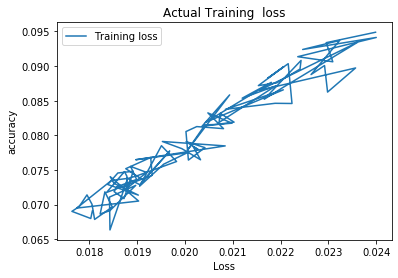

In [20]:
import matplotlib.pyplot as plt
loss = history_dict_v['loss']
accuracy = history_dict_v['mae']
plt.plot(loss,accuracy, label='Training loss')
plt.title('Actual Training  loss')
plt.xlabel('Loss')
plt.ylabel('accuracy')
plt.legend()

plt.show()

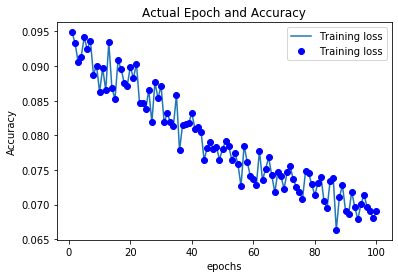

In [21]:

loss = history_dict_v['loss']
epochs = range(1, len(accuracy) + 1)
accuracy = history_dict_v['mae']
accuracyv = history_dict_v['mae']
plt.plot(epochs,accuracyv, label='Training loss')
plt.plot(epochs,accuracy,'bo', label='Training loss')
plt.title('Actual Epoch and Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
results = model.evaluate(test_data, test_label)

153/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================